# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which one is most trusted.

3. [x] Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. [x] Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. [x] Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio - not realistic since d3.js has steep learning curve before getting easy and usually just for NYT publications, not stakeholders who need quick answers to make fast decisions~~

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot

Doing sentiment analysis, so metric of success is if customers are happy (positive sentiment) with the product.

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users

Due to content being analyzed is users' opinions, then metric of interest will be: 

* Brand Perception
* User Satisfaction 

Both are vital to get a pulse on overall user sentiment of company as well as immediate sentiment after new product feature release.

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# 3. Visualizations on User Emotions

# 4. Other NLP-related analyses (e.g. Topic Modeling)

In [1]:
! pip install plotly==5.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import json

# Visualizations
import plotly.express as px
import plotly.graph_objects as go
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
from wordcloud import WordCloud

In [3]:
credentials = json.load(open('/kaggle/input/credentials/credentials.json'))

# Next iteration: get >100 comments

In [4]:
# Ref: https://github.com/analyticswithadam/Python/blob/main/YouTubeComments.ipynb

import googleapiclient.discovery
import googleapiclient.errors

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="RkresCXaVLE",
    maxResults=1000
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

# df.head(10)

In [5]:
# Peak at the data pull
df.head(10)

,author,published_at,updated_at,like_count,text
0,@robertmazurowski5974,2023-11-28T23:39:25Z,2023-11-28T23:39:25Z,0,I want GPT4 fo back to February when it cane out.
1,@davem1658,2023-11-22T11:06:03Z,2023-11-22T11:06:03Z,0,"I really like the term accelerationists verses the safety people (who want to slow things down). I would be in the safety group because its the right thing to do, but a part of me would be burning to be in the accelerationist group... The &#39;great filter&#39; theory has made me wonder why we haven&#39;t seen any spacefaring alien races in our own galaxy, with a supposedly 10 billion earth like planets, most with alot more time than our own earth. If complex life is easy to start, then, perhaps they get exterminated by a super intelligent AI when they get to a point of developing it. And this happens almost 100% of the time, with any such a alien race, when they get to that point. Afterwards, this AI has no desire to expand or send out transmissions for us to find ... I, maybe find out, in my lifetime; if the super intelligent AI we develop will do such a thing."
2,@Gabcikovo,2023-11-22T08:01:00Z,2023-11-22T08:01:25Z,1,Im so gonna enjoy this video with a nice cuppa coffee ☕️ ❤ thank you for existing 💖
3,@Verntallat7,2023-11-20T17:09:37Z,2023-11-20T17:09:37Z,0,any machine with the dreaded &quot;reggaeton&quot; on it automatically belongs to a scrapyard
4,@tomasdesouza2847,2023-11-20T16:26:50Z,2023-11-20T16:27:35Z,0,You slowed down your voice didn&#39;t you? Sounds like it. Maybe is beneficial for educational purposes.
5,@squamish4244,2023-11-18T05:35:26Z,2023-11-18T05:36:18Z,0,Now he&#39;s going to have to address Sam Altman being canned from OpenAI. Who knew someone being fired from a company - the most ordinary thing in the world - would make headlines around the world.
6,@sethhavens1574,2023-11-18T02:03:30Z,2023-11-18T02:03:30Z,1,"Another great vid, thank you. As per the latest “innovations” from OpenAI etc the graphics, tts, etc. are cool enough, but attempting to build intelligent business apps with this, nothing really counts until they can achieve high level accuracy over large input context. Bells and whistles might get people excited, but they seriously need to focus on the basics and reliability before claiming the transformational agenda. More cool filters for photos or spam email generation doesn’t even need AI, let alone is it particularly impressive. Get me accuracy over 10,000 words deep retrieval and we can talk money!"
7,@ulychun,2023-11-17T22:43:03Z,2023-11-17T22:43:03Z,4,The thumbnail of your video is right on the spot of today’s news ! How the hell did you anticipate this ? 😂
8,@Lucas01legend,2023-11-17T12:27:19Z,2023-11-17T12:27:19Z,0,"At <a href=""https://www.youtube.com/watch?v=RkresCXaVLE&amp;t=3m10s"">3:10</a> in the video, what plugin is he using?"
9,@tonystark-rj3oo,2023-11-17T01:17:04Z,2023-11-17T01:17:04Z,0,Lan AQ Ukraynaca var Türkçe çeviri yok Allah kahretsin be


# Add sentiment
## Candidates:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [6]:
# Vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df_vader.head(10)

,author,published_at,updated_at,like_count,text,rating,compound,neg,neu,pos
0,@robertmazurowski5974,2023-11-28T23:39:25Z,2023-11-28T23:39:25Z,0,I want GPT4 fo back to February when it cane out.,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}",0.0772,0.000,0.874,0.126
1,@davem1658,2023-11-22T11:06:03Z,2023-11-22T11:06:03Z,0,"I really like the term accelerationists verses the safety people (who want to slow things down). I would be in the safety group because its the right thing to do, but a part of me would be burning to be in the accelerationist group... The &#39;great filter&#39; theory has made me wonder why we haven&#39;t seen any spacefaring alien races in our own galaxy, with a supposedly 10 billion earth like planets, most with alot more time than our own earth. If complex life is easy to start, then, perhaps they get exterminated by a super intelligent AI when they get to a point of developing it. And this happens almost 100% of the time, with any such a alien race, when they get to that point. Afterwards, this AI has no desire to expand or send out transmissions for us to find ... I, maybe find out, in my lifetime; if the super intelligent AI we develop will do such a thing.","{'neg': 0.015, 'neu': 0.77, 'pos': 0.215, 'compound': 0.9889}",0.9889,0.015,0.770,0.215
2,@Gabcikovo,2023-11-22T08:01:00Z,2023-11-22T08:01:25Z,1,Im so gonna enjoy this video with a nice cuppa coffee ☕️ ❤ thank you for existing 💖,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8307}",0.8307,0.000,0.578,0.422
3,@Verntallat7,2023-11-20T17:09:37Z,2023-11-20T17:09:37Z,0,any machine with the dreaded &quot;reggaeton&quot; on it automatically belongs to a scrapyard,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5719}",-0.5719,0.252,0.748,0.000
4,@tomasdesouza2847,2023-11-20T16:26:50Z,2023-11-20T16:27:35Z,0,You slowed down your voice didn&#39;t you? Sounds like it. Maybe is beneficial for educational purposes.,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6597}",0.6597,0.000,0.722,0.278
5,@squamish4244,2023-11-18T05:35:26Z,2023-11-18T05:36:18Z,0,Now he&#39;s going to have to address Sam Altman being canned from OpenAI. Who knew someone being fired from a company - the most ordinary thing in the world - would make headlines around the world.,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.5574}",-0.5574,0.101,0.899,0.000
6,@sethhavens1574,2023-11-18T02:03:30Z,2023-11-18T02:03:30Z,1,"Another great vid, thank you. As per the latest “innovations” from OpenAI etc the graphics, tts, etc. are cool enough, but attempting to build intelligent business apps with this, nothing really counts until they can achieve high level accuracy over large input context. Bells and whistles might get people excited, but they seriously need to focus on the basics and reliability before claiming the transformational agenda. More cool filters for photos or spam email generation doesn’t even need AI, let alone is it particularly impressive. Get me accuracy over 10,000 words deep retrieval and we can talk money!","{'neg': 0.067, 'neu': 0.752, 'pos': 0.181, 'compound': 0.9243}",0.9243,0.067,0.752,0.181
7,@ulychun,2023-11-17T22:43:03Z,2023-11-17T22:43:03Z,4,The thumbnail of your video is right on the spot of today’s news ! How the hell did you anticipate this ? 😂,"{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.7088}",-0.7088,0.205,0.795,0.000
8,@Lucas01legend,2023-11-17T12:27:19Z,2023-11-17T12:27:19Z,0,"At <a href=""https://www.youtube.com/watch?v=RkresCXaVLE&amp;t=3m10s"">3:10</a> in the video, what plugin is he using?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,1.000,0.000
9,@tonystark-rj3oo,2023-11-17T01:17:04Z,2023-11-17T01:17:04Z,0,Lan AQ Ukraynaca var Türkçe çeviri yok Allah kahretsin be,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,0.000,1.000,0.000


In [8]:
# Happy Transformer
df_ht = df.copy()

In [9]:
!pip install -q transformers
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [10]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens
# test = df_ht.head(5)

In [11]:
# test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
# test.head()

In [12]:
# test = (
# test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
#     .assign(
#          label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
#          score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
#     )
# )

# test.head()

Most likely will not use Hugging Face's Sentiment Analysis model since it has a vocab limit. Some comments are very long and this classifier has a "vocab" limit on what it classifies.

In [13]:
# TextBlob 
from textblob import TextBlob

df_tb = df.copy()
#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

,author,published_at,updated_at,like_count,text,sentiment,polarity,subjectivity
0,@robertmazurowski5974,2023-11-28T23:39:25Z,2023-11-28T23:39:25Z,0,I want GPT4 fo back to February when it cane out.,"(0.0, 0.0)",0.000000,0.000000
1,@davem1658,2023-11-22T11:06:03Z,2023-11-22T11:06:03Z,0,"I really like the term accelerationists verses the safety people (who want to slow things down). I would be in the safety group because its the right thing to do, but a part of me would be burning to be in the accelerationist group... The &#39;great filter&#39; theory has made me wonder why we haven&#39;t seen any spacefaring alien races in our own galaxy, with a supposedly 10 billion earth like planets, most with alot more time than our own earth. If complex life is easy to start, then, perhaps they get exterminated by a super intelligent AI when they get to a point of developing it. And this happens almost 100% of the time, with any such a alien race, when they get to that point. Afterwards, this AI has no desire to expand or send out transmissions for us to find ... I, maybe find out, in my lifetime; if the super intelligent AI we develop will do such a thing.","(0.22945326278659614, 0.6272927689594356)",0.229453,0.627293
2,@Gabcikovo,2023-11-22T08:01:00Z,2023-11-22T08:01:25Z,1,Im so gonna enjoy this video with a nice cuppa coffee ☕️ ❤ thank you for existing 💖,"(0.5, 0.75)",0.500000,0.750000
3,@Verntallat7,2023-11-20T17:09:37Z,2023-11-20T17:09:37Z,0,any machine with the dreaded &quot;reggaeton&quot; on it automatically belongs to a scrapyard,"(0.0, 0.0)",0.000000,0.000000
4,@tomasdesouza2847,2023-11-20T16:26:50Z,2023-11-20T16:27:35Z,0,You slowed down your voice didn&#39;t you? Sounds like it. Maybe is beneficial for educational purposes.,"(0.04722222222222221, 0.2694444444444445)",0.047222,0.269444


In [14]:
# Google NL API

df_gnl = df.copy()

In [15]:
# from google.cloud import language

# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung when calling for request to showing sentiment score on 3 sentences.

## Assessing Vader and TextBlob for best Sentiment Scores that best align with actual sentiment seen from human (sentient, emotion)

## Human
* Sentence 1: positive, funny
* Sentence 2: negative, criticism
* Sentence 3: postive, pleasantly surprised
* Sentence 4: neutral, curious
* Sentence 5: neutral
* Sentence 6: negative, critical
* Sentence 7: netural/negative, but critcial
* Sentence 8: positive, humored
* Sentence 9: positive, impressed
* Sentence 10: negative, critical

In [16]:
# Vader Scores | Only Sentence 8 incorrectly graded. So Grade: 9/10
df_vader['compound'][:10]

0    0.0772
1    0.9889
2    0.8307
3   -0.5719
4    0.6597
5   -0.5574
6    0.9243
7   -0.7088
8    0.0000
9    0.0000
Name: compound, dtype: float64

In [17]:
# Happy Transformer Scores | OUT OF 5 ONLY (won't be using this one). Grade: 4/5
# test[['label', 'score']]

In [18]:
# TextBlob Scores | Somewhat confusing grades for polarity. So Grade: 6/10
df_tb[['polarity', 'subjectivity']][:10]

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

,polarity,subjectivity
0,0.000000,0.000000
1,0.229453,0.627293
2,0.500000,0.750000
3,0.000000,0.000000
4,0.047222,0.269444
5,0.125000,0.500000
6,0.351139,0.631088
7,0.357143,0.535714
8,0.000000,0.000000
9,0.000000,0.000000


Using Vader since most clear scoring and accurate sentiment scores.

In [19]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score
0,@robertmazurowski5974,2023-11-28T23:39:25Z,2023-11-28T23:39:25Z,0,I want GPT4 fo back to February when it cane out.,0.0772
1,@davem1658,2023-11-22T11:06:03Z,2023-11-22T11:06:03Z,0,"I really like the term accelerationists verses the safety people (who want to slow things down). I would be in the safety group because its the right thing to do, but a part of me would be burning to be in the accelerationist group... The &#39;great filter&#39; theory has made me wonder why we haven&#39;t seen any spacefaring alien races in our own galaxy, with a supposedly 10 billion earth like planets, most with alot more time than our own earth. If complex life is easy to start, then, perhaps they get exterminated by a super intelligent AI when they get to a point of developing it. And this happens almost 100% of the time, with any such a alien race, when they get to that point. Afterwards, this AI has no desire to expand or send out transmissions for us to find ... I, maybe find out, in my lifetime; if the super intelligent AI we develop will do such a thing.",0.9889
2,@Gabcikovo,2023-11-22T08:01:00Z,2023-11-22T08:01:25Z,1,Im so gonna enjoy this video with a nice cuppa coffee ☕️ ❤ thank you for existing 💖,0.8307
3,@Verntallat7,2023-11-20T17:09:37Z,2023-11-20T17:09:37Z,0,any machine with the dreaded &quot;reggaeton&quot; on it automatically belongs to a scrapyard,-0.5719
4,@tomasdesouza2847,2023-11-20T16:26:50Z,2023-11-20T16:27:35Z,0,You slowed down your voice didn&#39;t you? Sounds like it. Maybe is beneficial for educational purposes.,0.6597


In [20]:
# Add categories for analytics, to cut metrics across chatbot and scraped sites
df['chatbot'] = 'chatGPT'
df['scraped'] = 'YouTube'

# Visualization :D

Candidates:

* Seaborn
* Altair :)
* Holoviews
* Plotly

Using Plotly since most easy to get interactive visualization up 

In [21]:
df.head()

,author,published_at,updated_at,like_count,text,sentiment_score,chatbot,scraped
0,@robertmazurowski5974,2023-11-28T23:39:25Z,2023-11-28T23:39:25Z,0,I want GPT4 fo back to February when it cane out.,0.0772,chatGPT,YouTube
1,@davem1658,2023-11-22T11:06:03Z,2023-11-22T11:06:03Z,0,"I really like the term accelerationists verses the safety people (who want to slow things down). I would be in the safety group because its the right thing to do, but a part of me would be burning to be in the accelerationist group... The &#39;great filter&#39; theory has made me wonder why we haven&#39;t seen any spacefaring alien races in our own galaxy, with a supposedly 10 billion earth like planets, most with alot more time than our own earth. If complex life is easy to start, then, perhaps they get exterminated by a super intelligent AI when they get to a point of developing it. And this happens almost 100% of the time, with any such a alien race, when they get to that point. Afterwards, this AI has no desire to expand or send out transmissions for us to find ... I, maybe find out, in my lifetime; if the super intelligent AI we develop will do such a thing.",0.9889,chatGPT,YouTube
2,@Gabcikovo,2023-11-22T08:01:00Z,2023-11-22T08:01:25Z,1,Im so gonna enjoy this video with a nice cuppa coffee ☕️ ❤ thank you for existing 💖,0.8307,chatGPT,YouTube
3,@Verntallat7,2023-11-20T17:09:37Z,2023-11-20T17:09:37Z,0,any machine with the dreaded &quot;reggaeton&quot; on it automatically belongs to a scrapyard,-0.5719,chatGPT,YouTube
4,@tomasdesouza2847,2023-11-20T16:26:50Z,2023-11-20T16:27:35Z,0,You slowed down your voice didn&#39;t you? Sounds like it. Maybe is beneficial for educational purposes.,0.6597,chatGPT,YouTube


# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [23]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [24]:
# Decided to include words that were going to common across sentiments such as the subject matter:
# GPT, AI, youtube
stopwords = STOPWORDS
stopwords.update(["br", "https", "href", "v", "rkrescxavle", "amp", "3m10s", "GPT", "GTP4", "AI", "openAI", "ai", "youtube", "watch", "video", "don", "y", "m"])

____

In [25]:
# Plotly Word Cloud
# x2011 = timesData.country[timesData.year == 2011]

# plt.subplots(figsize = (8,8))

# wordcloud = WordCloud (
#                     background_color = 'white',
#                     width = 512,
#                     height = 384
#                         ).generate(' '.join(x2011))
# plt.imshow(wordcloud) # image show
# plt.axis('off') # to off the axis of x and y
# plt.savefig('Plotly-World_Cloud.png')
# plt.show()

___

## Positive Sentiment

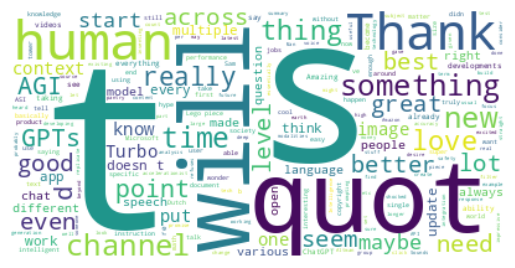

In [26]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive sentiment with chatGPT come from comments mentioning ```GPT```, ```AI``` and ```watch```.

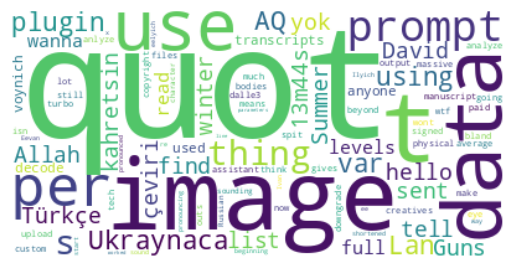

In [27]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Neutral sentiment with chatGPT come from comments that have ```image```, ```use```, ```data``` and ```prompt``` in it.

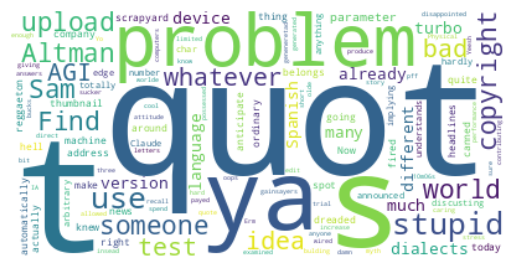

In [28]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Negative sentiment with chatGPT come from comments mentioning ```stupid```, ```problem``` and ```Sam```/```Altman```.

After taking out subject matter words (chatGPT, AI, youtube) from the word list, the segregation between pos, neutral and neg sentiments were clearer.

## Word clouds of unigrams is very loosely linked to sentiment. It is better to do a phrase cloud. So let's explore multi-gram (bi- and tri-) gram frequencies.

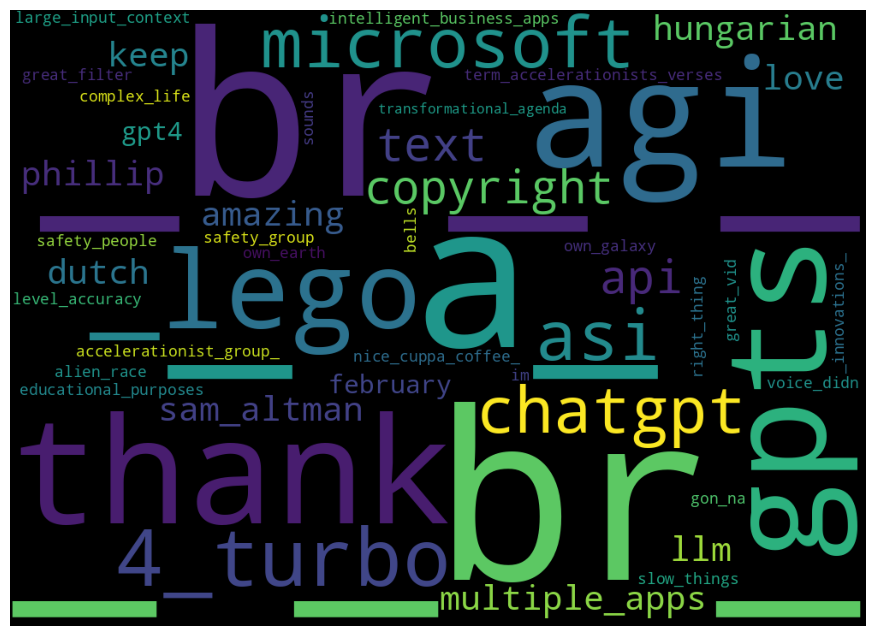

In [29]:
# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(pos_text)
 
# Finding the noun phrases (important keywords combination) in the text
# This can help to find out what entities are being talked about in the given text
NounPhrases= SampleTextInBlobFormat.noun_phrases
 
# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
# print('##### Important word combinations ####')
# print(NewNounString)
 
########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
 
 
from wordcloud import WordCloud, STOPWORDS
 
# Creating a custom list of stopwords
customStopwords = list(STOPWORDS) + ["br", "https", "href", "v", "rkrescxavle", "amp", "3m10s", "GPT", "GTP4", "AI", "openAI", "ai", "youtube", "watch", "video", "don", "y", "m"]
 
wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

This is not very helpful since stopword list included "br" and "a". So these both should not appear in result, but did. Going a different route, but first one to see from simple table output what are the popular bi/trigrams to compare to confirm above is not good output.

In [30]:
# Testing out alternative multi-gram approach on positive sentiment df first.
test2 = pos_df.copy()

from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,3), analyzer='word', stop_words = list(stopwords))
sparse_matrix = word_vectorizer.fit_transform(test2['text'])
frequencies = sparse_matrix.sum(axis=0).T
df_test = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df_test['n_grams'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test = df_test[['n_grams', 'frequency']]
df_test.sort_values(by='frequency', ascending=False)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'gpt', 'gtp4', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 'openai', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


,n_grams,frequency
125,39,68
1513,gpt,25
2577,quot,14
3470,will,13
2894,something,11
...,...,...
1228,every nuance civilization,1
1229,every quot,1
1230,every quot quot,1
1232,every single chat,1


In [31]:
#Focusing on top 20 first
sample = df_test.sort_values(by='frequency', ascending=False).head(20)
sample

,n_grams,frequency
125,39,68
1513,gpt,25
2577,quot,14
3470,will,13
2894,something,11
2222,new,10
2303,openai,9
3215,time,9
2033,love,9
2643,really,8


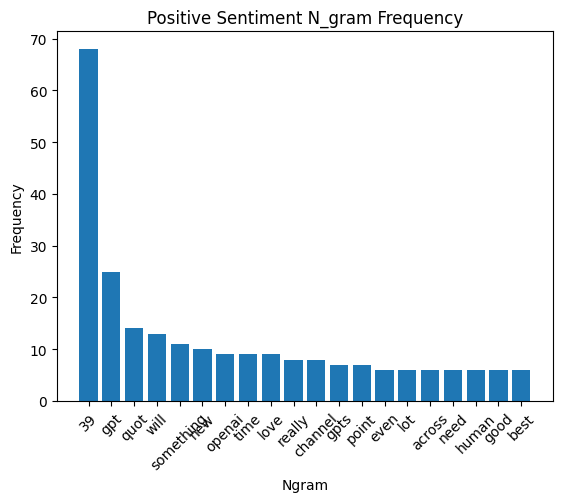

In [32]:
plt.bar(sample['n_grams'], sample['frequency'])
plt.xlabel('Ngram')
plt.ylabel('Frequency')
plt.title('Positive Sentiment N_gram Frequency')
plt.xticks(rotation=45)
plt.show()

In [33]:
# trying to get multiple-gram strings starting with bigram. need to take out non-helpful words such as youtube watch, amp and html tags
multi_grams = df_test.query('n_grams.str.count(" ") == [1]')
multi_grams.sort_values(by='frequency', ascending=False)[:20]

,n_grams,frequency
205,39 re,4
1098,doesn 39,4
1550,gpt turbo,4
241,39 ve,3
1056,didn 39,3
2596,quot quot,3
629,best channel,3
181,39 mean,2
2750,sam altman,2
338,across multiple,2


# Using Susan's bi/trigram visualizations

In [34]:
# bi- and tri-grams only
# word_vectorizer2 = CountVectorizer(ngram_range=(2,3), analyzer='word', stop_words = list(stopwords))
# sparse_matrix2 = word_vectorizer2.fit_transform(test2['text'])
# frequencies2 = sparse_matrix2.sum(axis=0).T
# df_test2 = pd.DataFrame(frequencies2, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
# df_test2['n_grams'] = df_test2.index
# df_test2.reset_index(drop=True, inplace=True)
# df_test2 = df_test2[['n_grams', 'frequency']]
# df_test2.sort_values(by='frequency', ascending=False)

# Remaining:
    
1. Questions to answer with sentiment score
1. Do for all sentiments
1. Scrape other YouTube vid's with other chatbots (2 vids/chatbot at least)
1. Scrape other app's

Apps > chatbot > Sentiment (get amazing visuals) > questions for each sentiment score > brand perception on each chatbot based on online sentiment